<a href="https://colab.research.google.com/github/2303A51876/ADM-1876/blob/main/ADM%20ASS-7(1876).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Load and Explore Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#Load dataset
data = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')
print("Dataset Loaded Successfully!")
print("First 5 Rows:\n", data.head())
print("Dataset Info:\n")
data.info()
print("Missing Values:\n", data.isnull().sum())

Dataset Loaded Successfully!
First 5 Rows:
                             uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4 

In [31]:
#Data Cleaning and Preprocessing
# Dropping rows with missing values
data.dropna(inplace=True)
print("Dataset after cleaning:")
data.info()

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 14058 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14058 non-null  object 
 1   crawl_timestamp          14058 non-null  object 
 2   product_url              14058 non-null  object 
 3   product_name             14058 non-null  object 
 4   product_category_tree    14058 non-null  object 
 5   pid                      14058 non-null  object 
 6   retail_price             14058 non-null  float64
 7   discounted_price         14058 non-null  float64
 8   image                    14058 non-null  object 
 9   is_FK_Advantage_product  14058 non-null  bool   
 10  description              14058 non-null  object 
 11  product_rating           14058 non-null  object 
 12  overall_rating           14058 non-null  object 
 13  brand                    14058 non-null  object 
 14  pro

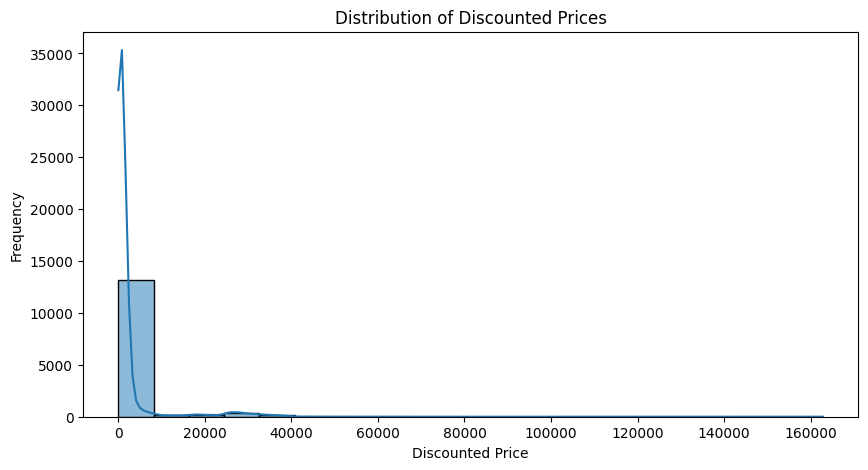

In [22]:
#Descriptive Statistics and Visualization
plt.figure(figsize=(10,5))
sns.histplot(data['discounted_price'], bins=20, kde=True)
plt.title("Distribution of Discounted Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Frequency")
plt.show()

In [23]:
#Feature Selection and Encoding
if 'product_category' in data.columns:
    encoder = LabelEncoder()
    data['product_category'] = encoder.fit_transform(data['product_category'].astype(str))
    print("Encoded Product Categories:", data['product_category'].unique())
else:
    print("Column 'product_category' not found in dataset")

Column 'product_category' not found in dataset


In [24]:
#Build a Machine Learning Model
if 'discounted_price' in data.columns and 'retail_price' in data.columns:
    features = ['discounted_price']
    if 'product_category' in data.columns:
        features.append('product_category')

    X = data[features]
    y = data['retail_price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Model Performance (MSE):", mean_squared_error(y_test, y_pred))
else:
    print("Required columns for ML model not found in dataset")

Model Performance (MSE): 4491087.871060781


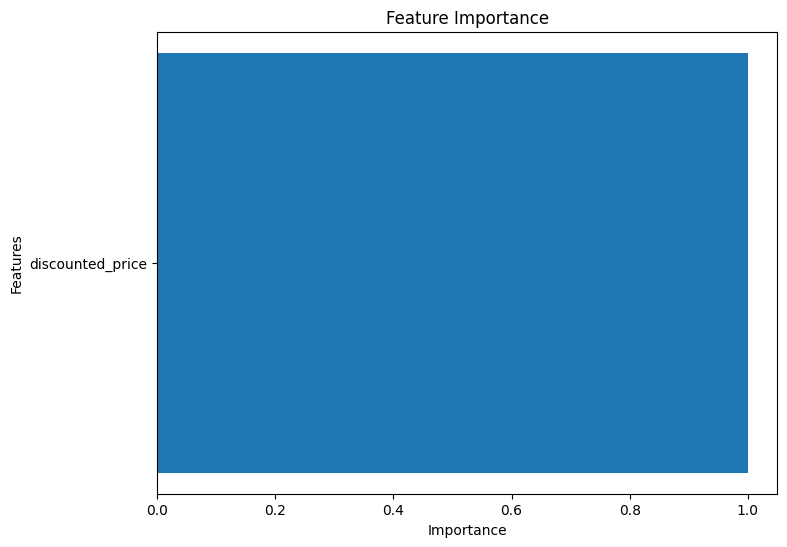

In [32]:
# Plot feature importance
if 'discounted_price' in data.columns and 'retail_price' in data.columns:
    feature_importance = model.feature_importances_
    features = ['discounted_price']

    if 'product_category' in data.columns:
        features.append('product_category')

    plt.figure(figsize=(8, 6))
    plt.barh(features, feature_importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [34]:
# One-Hot Encoding for categorical variables if necessary
if 'product_category' in data.columns:
    data_encoded = pd.get_dummies(data, columns=['product_category'], drop_first=True)
    print("One-Hot Encoded Data:\n", data_encoded.head())
else:
    print("Column 'product_category' not found in dataset")

Column 'product_category' not found in dataset


In [35]:
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
scaler = StandardScaler()
scaled_features = ['discounted_price', 'retail_price']
data[scaled_features] = scaler.fit_transform(data[scaled_features])
print("Scaled Data:\n", data[scaled_features].head())

Scaled Data:
    discounted_price  retail_price
0         -0.293639     -0.284891
1          2.910600      3.075605
2         -0.276371     -0.284891
3         -0.309756     -0.317247
4         -0.317958     -0.368909


In [36]:
from sklearn.model_selection import cross_val_score
# Cross-validation for Random Forest model
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

Cross-Validation Scores: [-3288344.20798427  -720538.25752566 -6451937.6731945  -9630008.63677114
 -1280062.02574369]
Average CV Score: -4274178.160243852


In [37]:
# Creating a new feature 'price_ratio' as the ratio of discounted price to retail price
data['price_ratio'] = data['discounted_price'] / data['retail_price']
print("New Feature 'price_ratio' added:\n", data[['discounted_price', 'retail_price', 'price_ratio']].head())

New Feature 'price_ratio' added:
    discounted_price  retail_price  price_ratio
0         -0.293639     -0.284891     1.030708
1          2.910600      3.075605     0.946350
2         -0.276371     -0.284891     0.970095
3         -0.309756     -0.317247     0.976389
4         -0.317958     -0.368909     0.861890


In [38]:
# Imputing missing values with mean for numerical columns
data['discounted_price'].fillna(data['discounted_price'].mean(), inplace=True)
data['retail_price'].fillna(data['retail_price'].median(), inplace=True)
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
price_ratio                0
dtype: int64


<ipython-input-38-392dcb00f43c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['discounted_price'].fillna(data['discounted_price'].mean(), inplace=True)
<ipython-input-38-392dcb00f43c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [39]:
from scipy.stats import zscore
# Identify outliers using Z-Score (threshold set to 3)
data['z_score'] = zscore(data['discounted_price'])
outliers = data[data['z_score'].abs() > 3]
print("Outliers Based on Z-Score:\n", outliers[['discounted_price', 'z_score']])

Outliers Based on Z-Score:
        discounted_price   z_score
375            4.576252  4.576252
394            4.396663  4.396663
395            3.877613  3.877613
411            4.696409  4.696409
412            3.569234  3.569234
...                 ...       ...
18596          4.981045  4.981045
18650          3.249198  3.249198
18662          3.249198  3.249198
18670          3.249198  3.249198
19439          3.248623  3.248623

[558 rows x 2 columns]
